In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


<Axes: >

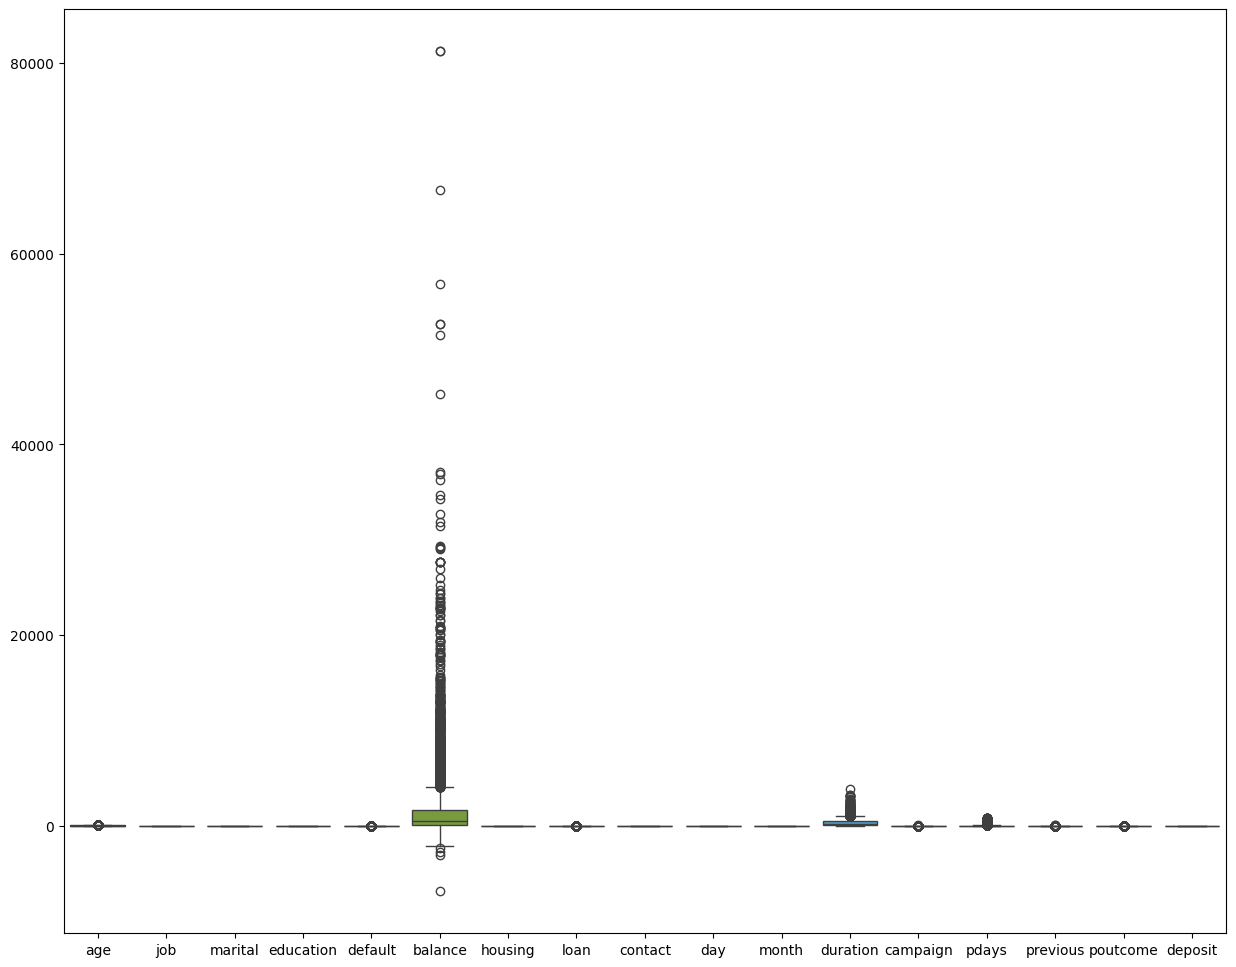

In [7]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df)

In [8]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in age attribute: [75, 85, 90, 85, 83, 76, 83, 77, 77, 76, 78, 95, 78, 75, 76, 85, 83, 79, 82, 79, 75, 76, 82, 77, 86, 76, 79, 83, 77, 84, 83, 75, 77, 76, 77, 87, 76, 92, 78, 82, 76, 77, 76, 81, 75, 80, 87, 76, 82, 77, 76, 81, 75, 78, 80, 86, 79, 79, 81, 75, 84, 87, 85, 79, 92, 77, 81, 80, 77, 78, 76, 80, 77, 76, 75, 82, 80, 78, 90, 83, 80, 82, 80, 84, 86, 75, 76, 77, 76, 77, 80, 77, 78, 75, 84, 78, 80, 80, 79, 86, 93, 82, 82, 77, 93, 77, 75, 80, 84, 75, 78, 81, 81, 77, 78, 75, 77, 77, 77, 78, 77, 79, 78, 75, 80, 76, 78, 79, 75, 77, 79, 78, 88, 77, 85, 78, 80, 82, 75, 77, 78, 78, 76, 81, 77, 75, 80, 80, 80, 76, 77, 81, 76, 76, 87, 81, 78, 82, 83, 77, 77, 75, 76, 89, 80, 77, 77, 88, 77, 78, 86]
Outliers in job attribute: []
Outliers in marital attribute: []
Outliers in education attribute: []
Outliers in default attribute: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
# Remove Outlier
def handle_outliers(data):
    # Compute percentiles
    tenth_percentile = np.percentile(data.dropna(), 10)
    ninetieth_percentile = np.percentile(data.dropna(), 90)
    
    # Handle outliers by capping
    data = np.where(data < tenth_percentile, tenth_percentile, data)
    data = np.where(data > ninetieth_percentile, ninetieth_percentile, data)
    
    return data

# Assuming df is your DataFrame
for i in ['age','poutcome','previous','pdays','campaign','duration','loan','balance','default']:
    df[i] = handle_outliers(df[i])

In [10]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    # Drop missing values
    data = data.dropna()
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Assuming df is your DataFrame
for i in df:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in", i, "attribute:", outliers)

Outliers in age attribute: []
Outliers in job attribute: []
Outliers in marital attribute: []
Outliers in education attribute: []
Outliers in default attribute: []
Outliers in balance attribute: []
Outliers in housing attribute: []
Outliers in loan attribute: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

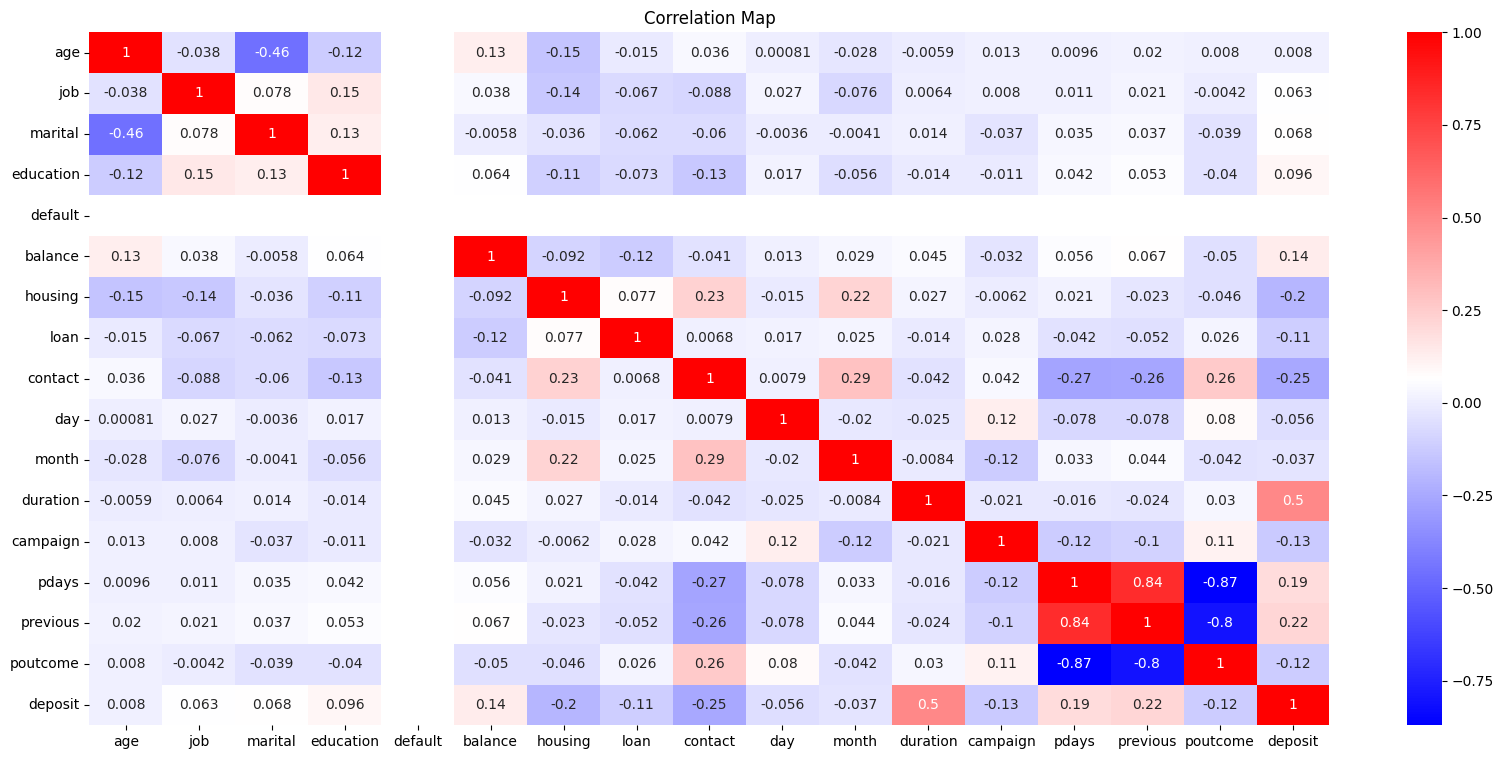

In [11]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='bwr')
plt.title("Correlation Map")
plt.show()

In [12]:
# Data Spliting

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['deposit'],axis = 1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((8929, 16), (2233, 16))

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[997, 208],
       [144, 884]])

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8423645320197044


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='accuracy')

array([0.8443449 , 0.84658455, 0.84770437, 0.8387458 , 0.8331467 ,
       0.83426652, 0.85666293, 0.85218365, 0.84210526, 0.83183857])

In [17]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[994, 211],
       [210, 818]])

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8114643976712942


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='accuracy')

array([0.84770437, 0.8174692 , 0.81634938, 0.8174692 , 0.81075028,
       0.81634938, 0.84210526, 0.82082867, 0.82642777, 0.80493274])

In [21]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[994, 211],
       [210, 818]])

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8114643976712942


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='accuracy')

array([0.84770437, 0.8174692 , 0.81634938, 0.8174692 , 0.81075028,
       0.81634938, 0.84210526, 0.82082867, 0.82642777, 0.80493274])